In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sample = sps.cauchy.rvs(size=100, scale=1)

Предполагая, что выборка из нормального распределения $N(\theta, 1)$ сравним байесовскую оценку и оценку методом максимального правдоподобия.

In [5]:
def est_bayes((mu, sigma), sample):
    return (float(mu) / (sigma) + sample.cumsum() / 1) \
            / (1. / float(sigma) + (np.arange(1, sample.size + 1))/1)
def est_max(sample):
    return sample.cumsum() / np.arange(1, sample.size + 1) 

Сопряженное распределение к нормальному с неизвестным коэффициентом сдвига — нормальное с параметрами

$a = \frac{\mu_0 + \sigma_0^2\sum\limits_{i=1}^{n}x_i}{1 + \sigma_0^2n}, \sigma^2= \frac{\sigma_0^2}{1+\sigma_0^2n}$, где $\mu_0, \sigma_0^2$ — параметры априорного распределения. 

Так как про $\theta$ известно, что с вероятностью не менее 0.95 выполнено неравенство $|\theta|<0.5$, возьмем параметры для априорного распределения $\mu_0 = 0, \sigma_0^2=0.0625$. Тогда априорное распределение соответствует априорным знаниям о $\theta$. Действительно:

In [10]:
print 'F(0.5) - F(-0.5) =', sps.norm.cdf(0.5, scale=np.sqrt(0.0625)) - sps.norm.cdf(-0.5, scale=np.sqrt(0.0625))

F(0.5) - F(-0.5) = 0.954499736104


где F - функция распределения нормального распределения с указанными выше параметрами.

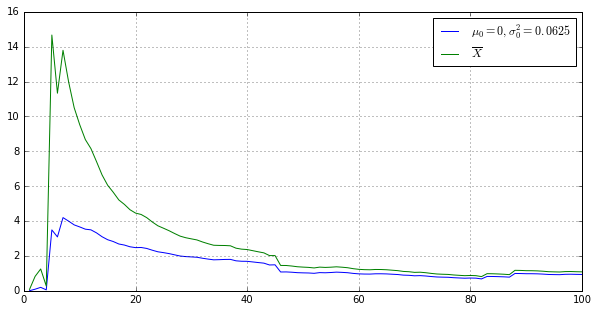

In [9]:
x = np.arange(1, sample.size + 1)
plt.figure(figsize=(10, 5))
plt.plot(x , np.abs(est_bayes((0, 0.0625), sample)), label='$\mu_0 = 0, \sigma_0^2=0.0625$')
plt.plot(x, np.abs(est_max(sample)), label='$\overline{X}$')
plt.legend()
plt.grid()

Видим, что при малых размерах выборки байесовская оценка дает результат лучше, чем оценка методом максимального правдоподобия.